In [94]:
import pandas as pd
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dropout,MaxPool2D,Input,Flatten,Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 

In [5]:
data = pd.read_csv("student_mental.csv")
data.head()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [7]:
data.drop(["Timestamp","What is your course?","What is your CGPA?"],axis=1,inplace=True)
data.head()

,Choose your gender,Age,Your current year of Study,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,Female,18.0,year 1,No,Yes,No,Yes,No
1,Male,21.0,year 2,No,No,Yes,No,No
2,Male,19.0,Year 1,No,Yes,Yes,Yes,No
3,Female,22.0,year 3,Yes,Yes,No,No,No
4,Male,23.0,year 4,No,No,No,No,No


In [18]:
data = pd.get_dummies(data,columns=["Your current year of Study"])
data.head()

,Choose your gender,Age,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?,Your current year of Study_Year 1,Your current year of Study_Year 2,Your current year of Study_Year 3,Your current year of Study_year 1,Your current year of Study_year 2,Your current year of Study_year 3,Your current year of Study_year 4
0,Female,18.0,No,Yes,No,Yes,No,False,False,False,True,False,False,False
1,Male,21.0,No,No,Yes,No,No,False,False,False,False,True,False,False
2,Male,19.0,No,Yes,Yes,Yes,No,True,False,False,False,False,False,False
3,Female,22.0,Yes,Yes,No,No,No,False,False,False,False,False,True,False
4,Male,23.0,No,No,No,No,No,False,False,False,False,False,False,True


In [34]:
data.dropna(inplace=True)
data.isna().sum()

Choose your gender                              0
Age                                             0
Marital status                                  0
Do you have Depression?                         0
Do you have Anxiety?                            0
Do you have Panic attack?                       0
Did you seek any specialist for a treatment?    0
Your current year of Study_Year 1               0
Your current year of Study_Year 2               0
Your current year of Study_Year 3               0
Your current year of Study_year 1               0
Your current year of Study_year 2               0
Your current year of Study_year 3               0
Your current year of Study_year 4               0
dtype: int64

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 100
Data columns (total 14 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   Choose your gender                            100 non-null    object
 1   Age                                           100 non-null    int32 
 2   Marital status                                100 non-null    object
 3   Do you have Depression?                       100 non-null    object
 4   Do you have Anxiety?                          100 non-null    object
 5   Do you have Panic attack?                     100 non-null    object
 6   Did you seek any specialist for a treatment?  100 non-null    object
 7   Your current year of Study_Year 1             100 non-null    bool  
 8   Your current year of Study_Year 2             100 non-null    bool  
 9   Your current year of Study_Year 3             100 non-null    bool  
 10  Your cu

In [36]:
#changing data types 
data["Age"] = data["Age"].astype(int)

In [38]:
data

,Choose your gender,Age,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?,Your current year of Study_Year 1,Your current year of Study_Year 2,Your current year of Study_Year 3,Your current year of Study_year 1,Your current year of Study_year 2,Your current year of Study_year 3,Your current year of Study_year 4
0,Female,18,No,Yes,No,Yes,No,False,False,False,True,False,False,False
1,Male,21,No,No,Yes,No,No,False,False,False,False,True,False,False
2,Male,19,No,Yes,Yes,Yes,No,True,False,False,False,False,False,False
3,Female,22,Yes,Yes,No,No,No,False,False,False,False,False,True,False
4,Male,23,No,No,No,No,No,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,Female,21,No,No,Yes,No,No,False,False,False,True,False,False,False
97,Male,18,No,Yes,Yes,No,No,False,True,False,False,False,False,False
98,Female,19,Yes,Yes,No,Yes,No,False,False,True,False,False,False,False
99,Female,23,No,No,No,No,No,False,False,False,False,False,False,True


In [48]:
#Take object columns
le = LabelEncoder()
object_columns = data.select_dtypes(include=['object']).columns
for column in object_columns:
    data[column] = le.fit_transform(data[column])


In [50]:
#Take object columns
le = LabelEncoder()
boolean_columns = data.select_dtypes(include=['bool']).columns
for column1 in boolean_columns:
    data[column1] = le.fit_transform(data[column1])


In [52]:
data.head()

,Choose your gender,Age,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?,Your current year of Study_Year 1,Your current year of Study_Year 2,Your current year of Study_Year 3,Your current year of Study_year 1,Your current year of Study_year 2,Your current year of Study_year 3,Your current year of Study_year 4
0,0,18,0,1,0,1,0,0,0,0,1,0,0,0
1,1,21,0,0,1,0,0,0,0,0,0,1,0,0
2,1,19,0,1,1,1,0,1,0,0,0,0,0,0
3,0,22,1,1,0,0,0,0,0,0,0,0,1,0
4,1,23,0,0,0,0,0,0,0,0,0,0,0,1


In [58]:
X = data.drop("Do you have Depression?",axis=1)
y = data["Do you have Depression?"]

In [62]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [64]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [84]:
model = Sequential()
model.add(Dense(64,activation='relu',input_dim=X_train.shape[1]))
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

C:\Users\ENGTNGT\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [86]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [104]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss',patience=10)
history = model.fit(X_train_scaled,y_train,epochs=500,batch_size=32,callbacks=[callback])

Epoch 1/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9438 - loss: 0.1204
Epoch 2/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9398 - loss: 0.1134  
Epoch 3/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9555 - loss: 0.1003
Epoch 4/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9359 - loss: 0.1244  
Epoch 5/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9672 - loss: 0.1012  
Epoch 6/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9438 - loss: 0.1217  
Epoch 7/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9594 - loss: 0.1059  
Epoch 8/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9359 - loss: 0.1273  
Epoch 9/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9516 - loss: 0.1136  
Epoch 10/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9297 - loss: 0.1158  
Epoch 11/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9359 - loss: 0.1275  
Epoch 12/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.95

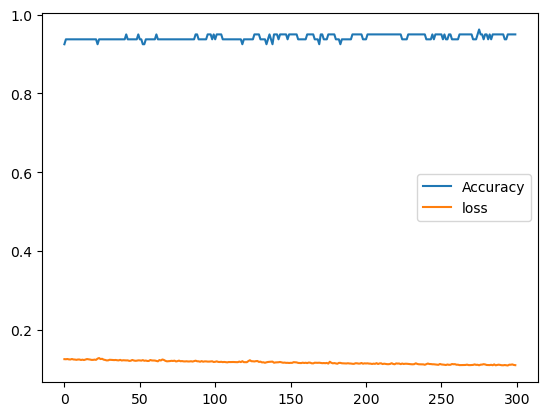

In [102]:
plt.plot(history.history["accuracy"],label="Accuracy")
#plt.plot(history.history["val_accuracy"],label="val_accuracy")
plt.plot(history.history["loss"],label="loss")
#plt.plot(history.history["val_loss"],label="val_loss")
plt.legend()
plt.show()